In [51]:
# =========================================
# 1. Import Required Libraries
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.dpi"] = 120




In [52]:
# =========================================
# 2. Pandas Display Settings (No Truncation)
# =========================================
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.2f}".format)



In [53]:
# =========================================
# 3. Load Dataset
# =========================================
file_path = r"C:\Users\kugurtoo\Downloads\azure_functions_raw.csv"

if os.path.exists(file_path):
    print("File found successfully.")
else:
    print("File not found. Please check the path.")

df = pd.read_csv(file_path)

print("\nDataset Loaded Successfully.")
print("Dataset Shape (Original):", df.shape)
print("\nColumn Names:")
print(df.columns)



File found successfully.

Dataset Loaded Successfully.
Dataset Shape (Original): (99999, 15)

Column Names:
Index(['HashOwner', 'HashApp', 'HashFunction', 'Average', 'Count', 'Minimum', 'Maximum', 'percentile_Average_0', 'percentile_Average_1', 'percentile_Average_25', 'percentile_Average_50', 'percentile_Average_75', 'percentile_Average_99', 'percentile_Average_100', 'day'], dtype='object')


In [54]:
# =========================================
# 4. Remove Invalid Negative Values
# =========================================
df = df[(df["Average"] >= 0) & (df["Count"] >= 0)]

print("\nDataset Shape (After Removing Negative Values):", df.shape)




Dataset Shape (After Removing Negative Values): (99994, 15)


In [55]:
# =========================================
# 5. Summary Statistics
# =========================================
print("\nSummary Statistics:\n")
print(df.describe())




Summary Statistics:

         Average        Count    Minimum    Maximum  percentile_Average_0  percentile_Average_1  percentile_Average_25  percentile_Average_50  percentile_Average_75  percentile_Average_99  percentile_Average_100      day
count   99994.00     99994.00   99994.00   99994.00              99994.00              99994.00               99994.00               99994.00               99994.00               99994.00                99994.00 99994.00
mean     9543.24     20810.74    6459.90   24589.21               6538.02               6646.79                7572.24                8622.20               10619.79               18181.74                23239.71     1.50
std     39905.27    882086.01   34797.53   83511.23              34803.45              35052.31               37331.30               39324.61               44394.40               65418.67                81654.31     0.50
min         0.00         1.00 -337750.00       0.00            -146549.00               -984.0

In [56]:
# =========================================
# 6. Missing Value Analysis
# =========================================
print("\nMissing Values:\n")
print(df.isnull().sum())




Missing Values:

HashOwner                 0
HashApp                   0
HashFunction              0
Average                   0
Count                     0
Minimum                   0
Maximum                   0
percentile_Average_0      0
percentile_Average_1      0
percentile_Average_25     0
percentile_Average_50     0
percentile_Average_75     0
percentile_Average_99     0
percentile_Average_100    0
day                       0
dtype: int64


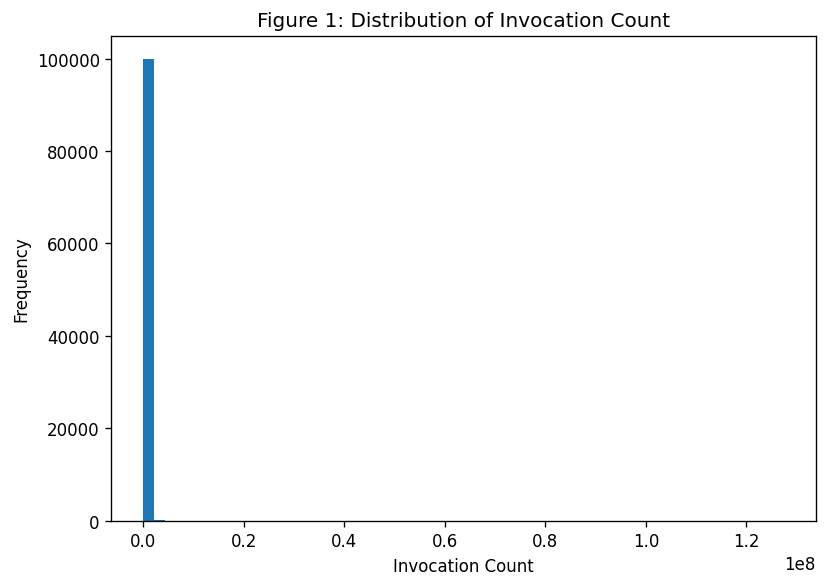

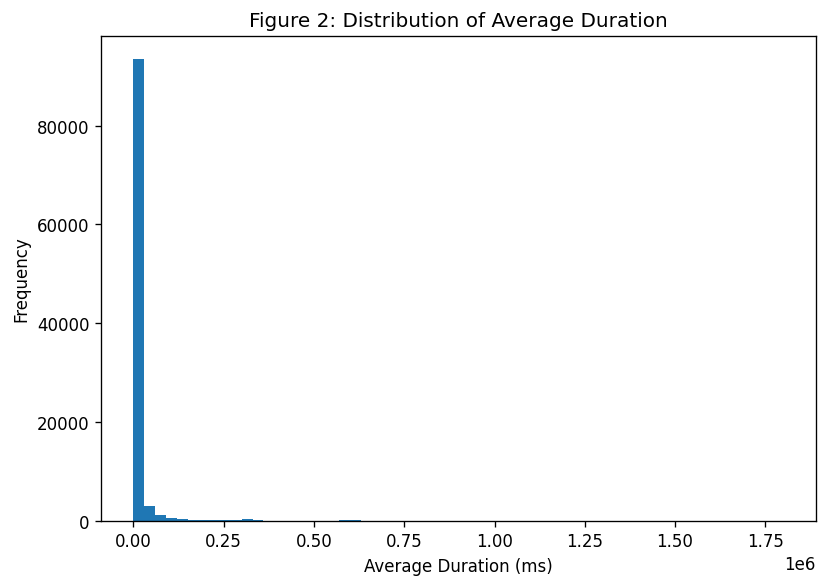

In [57]:
# =========================================
# 7. Distribution Analysis (Raw Scale)
# =========================================
plt.figure(figsize=(7,5))
plt.hist(df["Count"], bins=60)
plt.title("Figure 1: Distribution of Invocation Count")
plt.xlabel("Invocation Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.hist(df["Average"], bins=60)
plt.title("Figure 2: Distribution of Average Duration")
plt.xlabel("Average Duration (ms)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



C:\Users\kugurtoo\AppData\Local\Temp\ipykernel_24952\2504651786.py:5: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(df["Count"], vert=False)


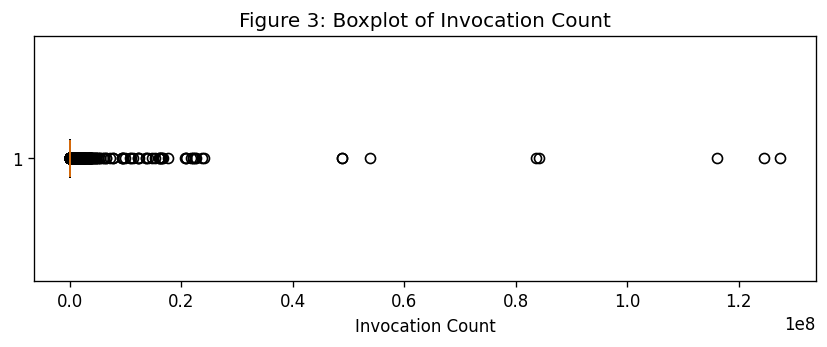

C:\Users\kugurtoo\AppData\Local\Temp\ipykernel_24952\2504651786.py:12: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(df["Average"], vert=False)


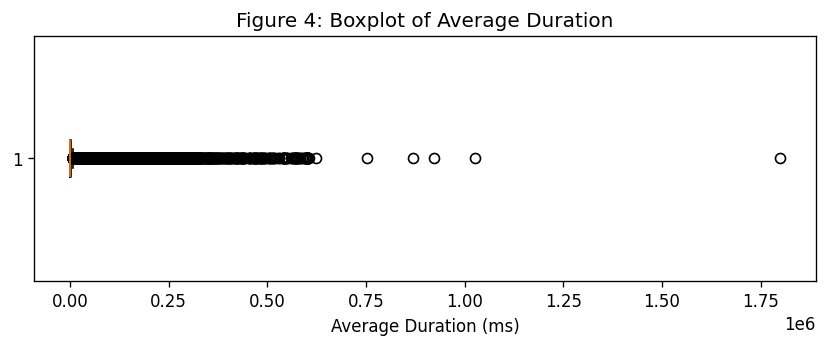

In [58]:
# =========================================
# 8. Boxplots
# =========================================
plt.figure(figsize=(7,3))
plt.boxplot(df["Count"], vert=False)
plt.title("Figure 3: Boxplot of Invocation Count")
plt.xlabel("Invocation Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,3))
plt.boxplot(df["Average"], vert=False)
plt.title("Figure 4: Boxplot of Average Duration")
plt.xlabel("Average Duration (ms)")
plt.tight_layout()
plt.show()



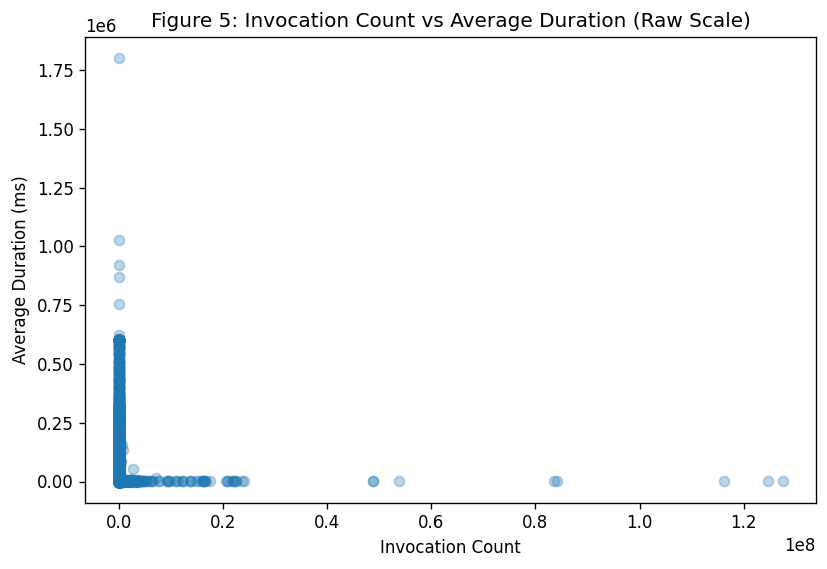


Raw Correlation: -0.005016289877222311


In [59]:
# =========================================
# 9. Scatterplot (Raw Scale)
# =========================================
plt.figure(figsize=(7,5))
plt.scatter(df["Count"], df["Average"], alpha=0.3)
plt.title("Figure 5: Invocation Count vs Average Duration (Raw Scale)")
plt.xlabel("Invocation Count")
plt.ylabel("Average Duration (ms)")
plt.tight_layout()
plt.show()

raw_corr = df["Count"].corr(df["Average"])
print("\nRaw Correlation:", raw_corr)



In [60]:
# =========================================
# 10. Skewness
# =========================================
print("\nSkewness Values:")
print("Invocation Count:", df["Count"].skew())
print("Average Duration:", df["Average"].skew())




Skewness Values:
Invocation Count: 106.56950863588486
Average Duration: 9.366679740070937


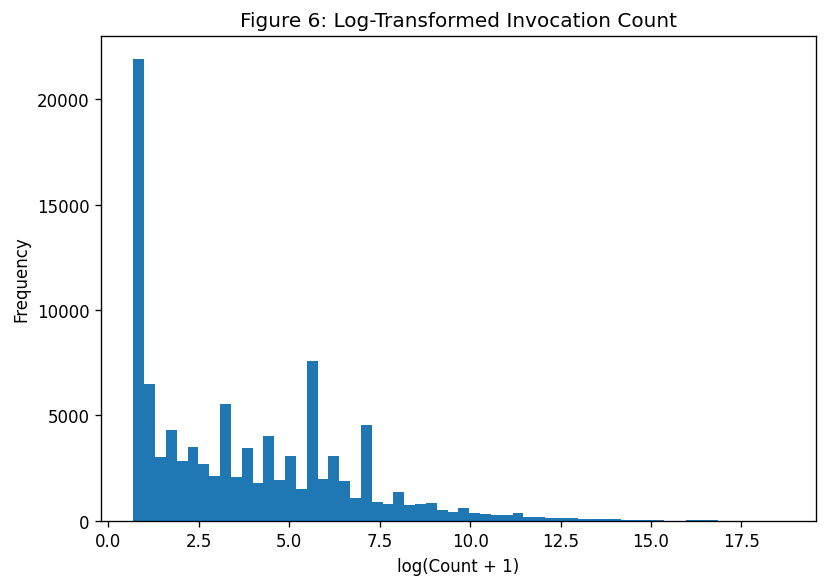

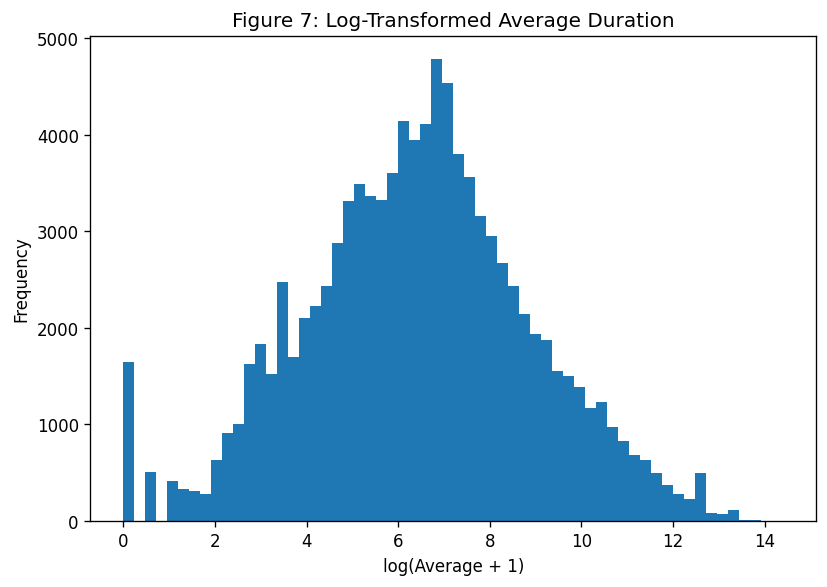

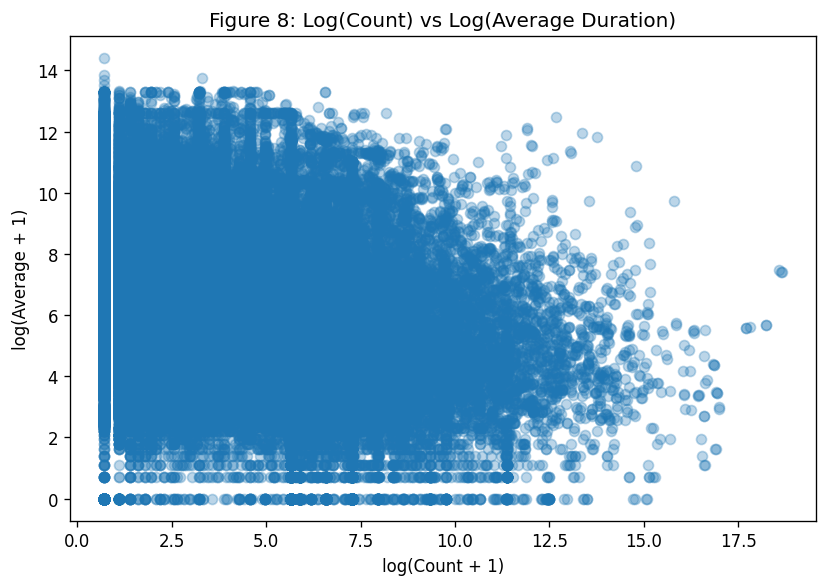


Log-Scale Correlation: -0.23683791317103853


In [61]:
# =========================================
# 11. Log Transformation (Safe)
# =========================================
df["log_Count"] = np.log1p(df["Count"])
df["log_Average"] = np.log1p(df["Average"])

plt.figure(figsize=(7,5))
plt.hist(df["log_Count"], bins=60)
plt.title("Figure 6: Log-Transformed Invocation Count")
plt.xlabel("log(Count + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.hist(df["log_Average"], bins=60)
plt.title("Figure 7: Log-Transformed Average Duration")
plt.xlabel("log(Average + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df["log_Count"], df["log_Average"], alpha=0.3)
plt.title("Figure 8: Log(Count) vs Log(Average Duration)")
plt.xlabel("log(Count + 1)")
plt.ylabel("log(Average + 1)")
plt.tight_layout()
plt.show()

log_corr = df["log_Count"].corr(df["log_Average"])
print("\nLog-Scale Correlation:", log_corr)

In [62]:
# =========================================
# 1. Imports
# =========================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120

In [63]:
# =========================================
# 2. Clean Dataset (Remove Invalid Values)
# =========================================
df_clean = df[
    (df["Average"] >= 0) &
    (df["Count"] >= 0)
].copy()

print("Dataset shape after cleaning:", df_clean.shape)

Dataset shape after cleaning: (99994, 17)


In [64]:
# =========================================
# 3. Log Transformation
# =========================================
df_clean["log_Average"] = np.log1p(df_clean["Average"])
df_clean["log_Count"] = np.log1p(df_clean["Count"])

In [65]:
# =========================================
# MODEL 1 — Baseline Log-Log Regression
# =========================================
X_m1 = df_clean[["log_Count"]]
y_m1 = df_clean["log_Average"]

X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(
    X_m1, y_m1, test_size=0.2, random_state=42
)

model1 = LinearRegression()
model1.fit(X_train_m1, y_train_m1)

y_pred_m1 = model1.predict(X_test_m1)

rmse_m1 = np.sqrt(mean_squared_error(y_test_m1, y_pred_m1))
r2_m1 = r2_score(y_test_m1, y_pred_m1)

print("\nMODEL 1 — Baseline Log-Log")
print("RMSE:", round(rmse_m1, 4))
print("R2:", round(r2_m1, 4))


MODEL 1 — Baseline Log-Log
RMSE: 2.4282
R2: 0.051


In [66]:
# =========================================
# MODEL 2 — Multivariate (Contains Leakage)
# =========================================
df_leak = df_clean[
    (df_clean["Minimum"] >= 0) &
    (df_clean["Maximum"] >= 0)
].copy()

df_leak["log_Minimum"] = np.log1p(df_leak["Minimum"])
df_leak["log_Maximum"] = np.log1p(df_leak["Maximum"])

X_m2 = df_leak[["log_Count", "log_Minimum", "log_Maximum", "day"]]
y_m2 = df_leak["log_Average"]

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(
    X_m2, y_m2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train_m2, y_train_m2)

y_pred_m2 = model2.predict(X_test_m2)

rmse_m2 = np.sqrt(mean_squared_error(y_test_m2, y_pred_m2))
r2_m2 = r2_score(y_test_m2, y_pred_m2)

print("\nMODEL 2 — Multivariate (Contains Leakage)")
print("RMSE:", round(rmse_m2, 4))
print("R2:", round(r2_m2, 4))


MODEL 2 — Multivariate (Contains Leakage)
RMSE: 0.6521
R2: 0.9311


In [67]:
# =========================================
# MODEL 3 — Clean Multivariate (No Leakage)
# =========================================
X_m3 = df_clean[["log_Count", "day"]]
y_m3 = df_clean["log_Average"]

X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(
    X_m3, y_m3, test_size=0.2, random_state=42
)

# --- Linear Regression (Clean) ---
model3_lin = LinearRegression()
model3_lin.fit(X_train_m3, y_train_m3)

y_pred_m3_lin = model3_lin.predict(X_test_m3)

rmse_m3_lin = np.sqrt(mean_squared_error(y_test_m3, y_pred_m3_lin))
r2_m3_lin = r2_score(y_test_m3, y_pred_m3_lin)

print("\nMODEL 3A — Clean Linear Regression (No Leakage)")
print("RMSE:", round(rmse_m3_lin, 4))
print("R2:", round(r2_m3_lin, 4))

# --- Random Forest (Clean) ---
model3_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model3_rf.fit(X_train_m3, y_train_m3)

y_pred_m3_rf = model3_rf.predict(X_test_m3)

rmse_m3_rf = np.sqrt(mean_squared_error(y_test_m3, y_pred_m3_rf))
r2_m3_rf = r2_score(y_test_m3, y_pred_m3_rf)

print("\nMODEL 3B — Clean Random Forest (No Leakage)")
print("RMSE:", round(rmse_m3_rf, 4))
print("R2:", round(r2_m3_rf, 4))


MODEL 3A — Clean Linear Regression (No Leakage)
RMSE: 2.4282
R2: 0.051

MODEL 3B — Clean Random Forest (No Leakage)
RMSE: 2.4158
R2: 0.0607


In [68]:
# =========================================
# TABLE 1 — Model Performance Comparison
# =========================================
results_table = pd.DataFrame({
    "Model": [
        "Baseline Log-Log",
        "Multivariate (Leakage - Rejected)",
        "Clean Linear Regression",
        "Clean Random Forest"
    ],
    "RMSE": [
        rmse_m1,
        rmse_m2,
        rmse_m3_lin,
        rmse_m3_rf
    ],
    "R_squared": [
        r2_m1,
        r2_m2,
        r2_m3_lin,
        r2_m3_rf
    ]
})

results_table["RMSE"] = results_table["RMSE"].round(4)
results_table["R_squared"] = results_table["R_squared"].round(4)

print("\nTABLE 1 — Model Performance Comparison")
print(results_table)


TABLE 1 — Model Performance Comparison
                               Model  RMSE  R_squared
0                   Baseline Log-Log  2.43       0.05
1  Multivariate (Leakage - Rejected)  0.65       0.93
2            Clean Linear Regression  2.43       0.05
3                Clean Random Forest  2.42       0.06


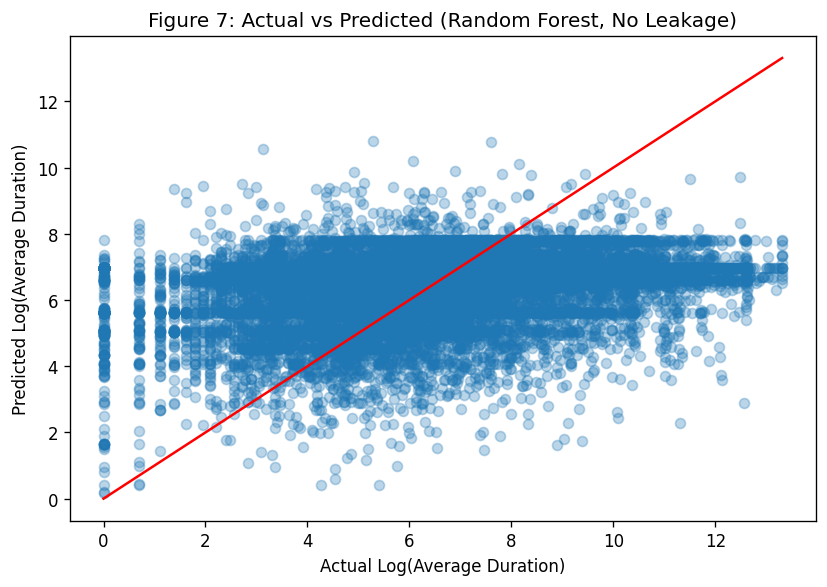

In [69]:
# =========================================
# FIGURE 6 — Actual vs Predicted (RF)
# =========================================
plt.figure(figsize=(7,5))
plt.scatter(y_test_m3, y_pred_m3_rf, alpha=0.3)
plt.plot(
    [y_test_m3.min(), y_test_m3.max()],
    [y_test_m3.min(), y_test_m3.max()],
    color="red"
)
plt.title("Figure 7: Actual vs Predicted (Random Forest, No Leakage)")
plt.xlabel("Actual Log(Average Duration)")
plt.ylabel("Predicted Log(Average Duration)")
plt.tight_layout()
plt.show()

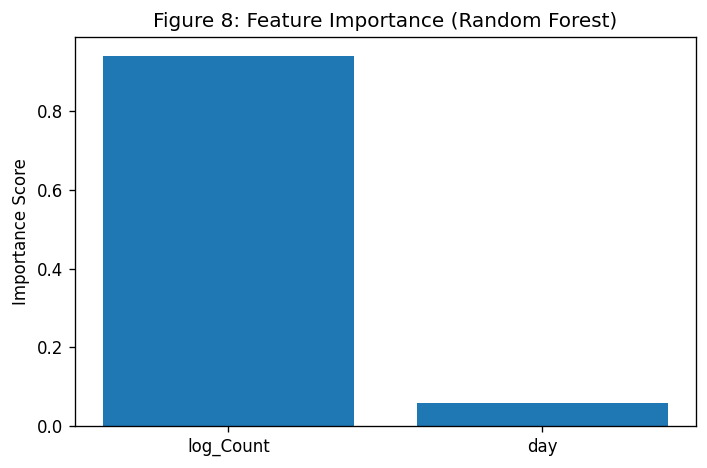

In [70]:
# =========================================
# FIGURE 7 — Feature Importance (RF)
# =========================================
feature_importance = model3_rf.feature_importances_
features = X_train_m3.columns

plt.figure(figsize=(6,4))
plt.bar(features, feature_importance)
plt.title("Figure 8: Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Apply the log(1+x) transformation mentioned in your EDA
df['log_Count'] = np.log1p(df['Count'])
df['log_Average'] = np.log1p(df['Average'])

# 2. Define Features (X) and Target (y) using the transformed data
X = df[['log_Count']]
y = df['log_Average']

# 3. Split the Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Baseline Model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 5. Train Challenger Model: Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 6. Evaluate Models
print("--- MODEL EVALUATION (Log Scale) ---")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")
print(f"Linear Regression R2:   {r2_score(y_test, lr_pred):.4f}\n")

print(f"Random Forest RMSE:     {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")
print(f"Random Forest R2:       {r2_score(y_test, rf_pred):.4f}")

--- MODEL EVALUATION (Log Scale) ---
Linear Regression RMSE: 2.4282
Linear Regression R2:   0.0510

Random Forest RMSE:     2.3690
Random Forest R2:       0.0967
